In [1]:
import numpy as np
import pandas as pd

In [15]:
df = pd.read_excel("Dane.xlsx","DANE2")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PŁACA            40 non-null     int64  
 1   PREMIA           40 non-null     int64  
 2   PREFIX           40 non-null     object 
 3   SAMPLE1          40 non-null     int64  
 4   SAMPLE2          40 non-null     int64  
 5   PŁEĆ             40 non-null     object 
 6   WYKSZT           40 non-null     object 
 7   ZAPOTRZEBOWANIE  40 non-null     object 
 8   WSKAŹNIK1        40 non-null     float64
 9   WSKAŹNIK2        40 non-null     float64
 10  STAŻ             40 non-null     int64  
 11  BRAKI1           19 non-null     float64
 12  BRAKI2           21 non-null     float64
 13  PUNKTY1          40 non-null     int64  
 14  PUNKTY2          40 non-null     int64  
 15  WIEK             40 non-null     int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 5.1+ KB


In [17]:
df.head()

,PŁACA,PREMIA,PREFIX,SAMPLE1,SAMPLE2,PŁEĆ,WYKSZT,ZAPOTRZEBOWANIE,WSKAŹNIK1,WSKAŹNIK2,STAŻ,BRAKI1,BRAKI2,PUNKTY1,PUNKTY2,WIEK
0,5600,2200,B,14,19,kobieta,średnie,niski,0.020000,0.007857,2,12.0,12.0,504,500,21
1,5300,4100,B,11,9,kobieta,średnie,sredni,0.018929,0.014643,3,NaN,NaN,472,530,23
2,4200,4900,B,13,17,kobieta,średnie,niski,0.015000,0.017500,3,11.0,10.0,444,420,24
3,5800,3200,A,13,10,mężczyzn,średnie,sredni,0.020714,0.011429,4,NaN,7.0,511,450,25
4,715,90000,B,12,10,mężczyzn,sz_pom,sredni,0.025536,0.032143,4,NaN,NaN,604,690,26


In [18]:
set(df["WYKSZT"].dropna())

{'podst', 'sz_pom', 'wyzsze', 'średnie'}

In [19]:
set(df["ZAPOTRZEBOWANIE"].dropna())

{'niski', 'sredni', 'wysoki'}

In [21]:
set(df["PREFIX"].dropna())

{'A', 'B'}

In [153]:
classifiers = [
    "PŁEĆ","WYKSZT","ZAPOTRZEBOWANIE","PREFIX"
]
numeric = [
    "WSKAŹNIK1","WSKAŹNIK2","PUNKTY1",
    "PUNKTY2","WIEK","PŁACA",
    "PREMIA"
]

In [154]:
model = {
    "classifiers":[classifiers[1]],
    "numeric":[numeric[6]]
}

In [155]:
education = df[model['classifiers'][0]].unique()
education

array(['średnie', 'sz_pom', 'wyzsze', 'podst'], dtype=object)

In [156]:
A = education[0]
B = education[2]

data = df.loc[[x in [A,B] for x in df[model['classifiers'][0]]]][model['classifiers']+model["numeric"]]

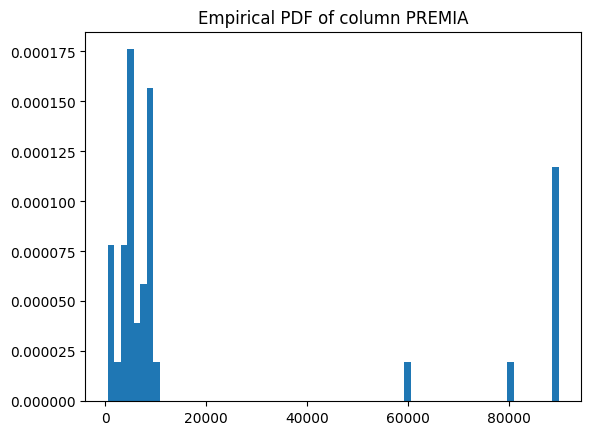

In [157]:
import matplotlib.pyplot as plt

X = df[model['numeric'][0]]
plt.hist(X, density = True, bins=70)
plt.title("Empirical PDF of column "+model['numeric'][0])
plt.show()

In [158]:
data.head()

,WYKSZT,PREMIA
0,średnie,2200
1,średnie,4100
2,średnie,4900
3,średnie,3200
5,średnie,8100


In [159]:
minshape = data.loc[data[model['classifiers'][0]]==A].shape[0]
minshape = min(minshape,data.loc[data[model['classifiers'][0]]==B].shape[0])

d1 = data.loc[data[model['classifiers'][0]]==A][model['numeric'][0]][:minshape]
d2 = data.loc[data[model['classifiers'][0]]==B][model['numeric'][0]][:minshape]
data = pd.DataFrame({
    model['classifiers'][0]:[A]*len(d1)+[B]*len(d2),
    model['numeric'][0]:d1.append(d2)
})

C:\Users\alexkras\AppData\Local\Temp\ipykernel_22060\949352208.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model['numeric'][0]:d1.append(d2)


In [160]:
data.head()

,WYKSZT,PREMIA
0,średnie,2200
1,średnie,4100
2,średnie,4900
3,średnie,3200
5,średnie,8100


In [161]:
from bioinfokit.analys import stat

res = stat()
res.ttest(df=data, xfac=model['classifiers'][0], \
          res=model['numeric'][0], \
          test_type=2)
print(res.summary)


Two sample t-test with equal variance

------------------  -------------
Mean diff            11207.7
t                        0.916883
Std Error            12223.7
df                      20
p value (one-tail)       0.185064
p value (two-tail)       0.370128
Lower 95.0%         -14290.5
Upper 95.0%          36706
------------------  -------------

Parameter estimates

Level      Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
wyzsze         11  22418.2    33459.6     10088.4        -60.2713        44896.6
średnie        11  11210.5    22892.6      6902.37     -4168.98          26589.9



In [163]:
t, p = res.result[1], res.result[3]
t, p

(0.9168833121659851, 0.37012833493770414)

H0: Group B mean is == Group A mean<br>
Alternative: Group B mean is > Group A mean

The p-value p is >0.05 => Alternative hypothesis has place